# EDA para las bases de datos

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")

### Importamos el dataset con la información general de Steam

In [19]:
df = pd.read_csv(r'dataset_finales/Dataset_final.csv', low_memory=False)
df_games = pd.read_csv(r'dataset_finales/steam_games_organizados.csv', low_memory=False)
df_numerico = pd.read_csv(r'dataset_finales/Dataset_Final_Numeros.csv', low_memory=False)
opinion = pd.read_csv(r'dataset_finales/australian_user_reviews_organizados.csv', low_memory=False)

In [5]:
df.columns                  #Revisamos las columnas

Index(['genres', 'app_name', 'release_date', 'id', 'developer', 'Accounting',
       'Action', 'Adventure', 'Animation &amp; Modeling', 'Audio Production',
       'Casual', 'Design &amp; Illustration', 'Early Access', 'Education',
       'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing',
       'RPG', 'Racing', 'Simulation', 'Software Training', 'Sports',
       'Strategy', 'Utilities', 'Video Production', 'Web Publishing',
       'user_id', 'items_count', 'steam_id', 'playtime_forever',
       'playtime_2weeks', 'user_url', 'funny', 'last_edited', 'item_id',
       'helpful', 'recommend', 'review', 'posted_year', 'sentiment_score'],
      dtype='object')

- Cargamos el dataset numérico para análisis de correlación de variables

In [7]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28663 entries, 0 to 28662
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   genres                     28663 non-null  object
 1   app_name                   28663 non-null  object
 2   release_date               28663 non-null  int64 
 3   id                         28663 non-null  int64 
 4   developer                  28663 non-null  object
 5   Accounting                 28663 non-null  int64 
 6   Action                     28663 non-null  int64 
 7   Adventure                  28663 non-null  int64 
 8   Animation &amp; Modeling   28663 non-null  int64 
 9   Audio Production           28663 non-null  int64 
 10  Casual                     28663 non-null  int64 
 11  Design &amp; Illustration  28663 non-null  int64 
 12  Early Access               28663 non-null  int64 
 13  Education                  28663 non-null  int64 
 14  Free t

In [8]:
df_numerico.info()                              #Revisamos el tipo de dato del dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52945 entries, 0 to 52944
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   release_date      52945 non-null  int64  
 1   id                52945 non-null  int64  
 2   Accounting        52945 non-null  int64  
 3   items_count       52945 non-null  int64  
 4   steam_id          52945 non-null  int64  
 5   playtime_forever  52945 non-null  int64  
 6   playtime_2weeks   52945 non-null  int64  
 7   item_id           52920 non-null  float64
 8   posted_year       43710 non-null  float64
 9   sentiment_score   52945 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 4.0 MB


## Realizamos un análisis de frecuencia de palabras

In [9]:
top_titles = df['app_name'].value_counts().nlargest(20)                                         #Obtenemos los títulos más comunes --> top-20
titles_text = ''.join(top_titles.index)                                                         #Crea una cadena con los título
WordCloud = WordCloud(width=1000, height=500, background_color='white').generate(titles_text)   #Crea la nube de palabras

#### Nube de palabras

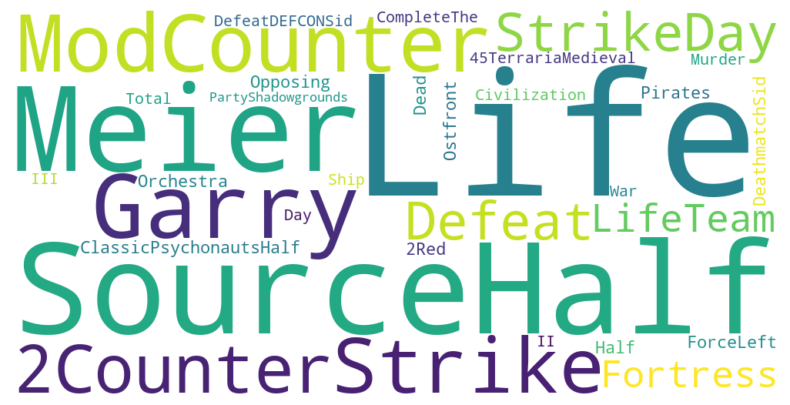

In [10]:
# Mostramos la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Frecuencia de titles de juegos

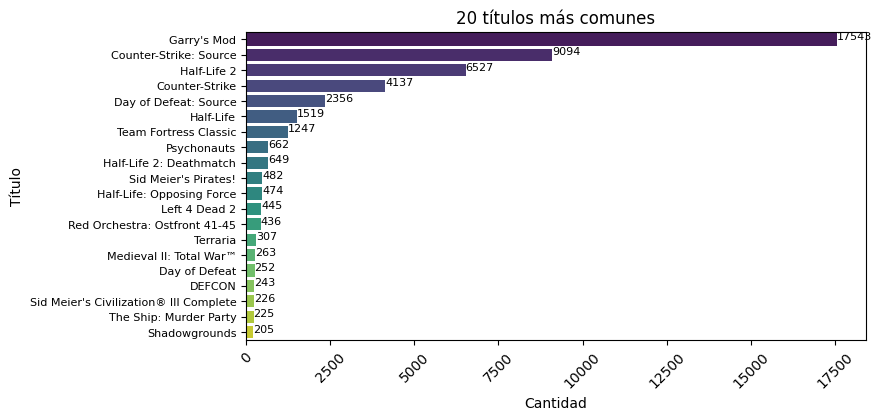

In [11]:
# Configuración de la figura y gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(y=top_titles.index, x=top_titles.values, palette='viridis')

# Etiquetas y título del gráfico
plt.xlabel('Cantidad')
plt.ylabel('Título')
plt.title('20 títulos más comunes')

# Rotación de las etiquetas en el eje x
plt.xticks(rotation=45)
plt.yticks(fontsize=8)

# Agregar el valor numérico en las barras
for index, value in enumerate(top_titles.values):
    plt.text(value, index, str(value), fontsize=8)

plt.show()

## Hacemos un análisis de dispersión de horas de juego por año

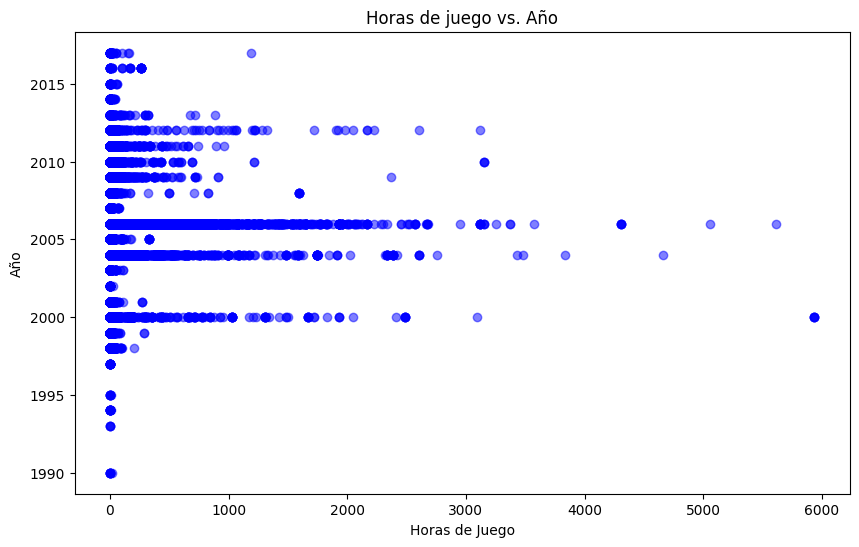

In [13]:
plt.figure(figsize=(10, 6))
df['playtime_hours'] = df['playtime_forever'] / 60                              #Calculamos las horas de juego diviendo por 60 minutos/hora
plt.scatter(df['playtime_hours'], df['release_date'], color='blue', alpha=0.5)  #Graficamos las horas de juego
plt.title('Horas de juego vs. Año')                                             #Agregamos etiquetas y títulos
plt.xlabel('Horas de Juego')
plt.ylabel('Año');

## Hacemos un análisis de sentimiento por año y score

In [14]:
grouped_data = df.groupby(['posted_year', 'sentiment_score']).size().reset_index(name='count')

In [15]:
pivot_data = grouped_data.pivot(index='posted_year', columns='sentiment_score', values='count')

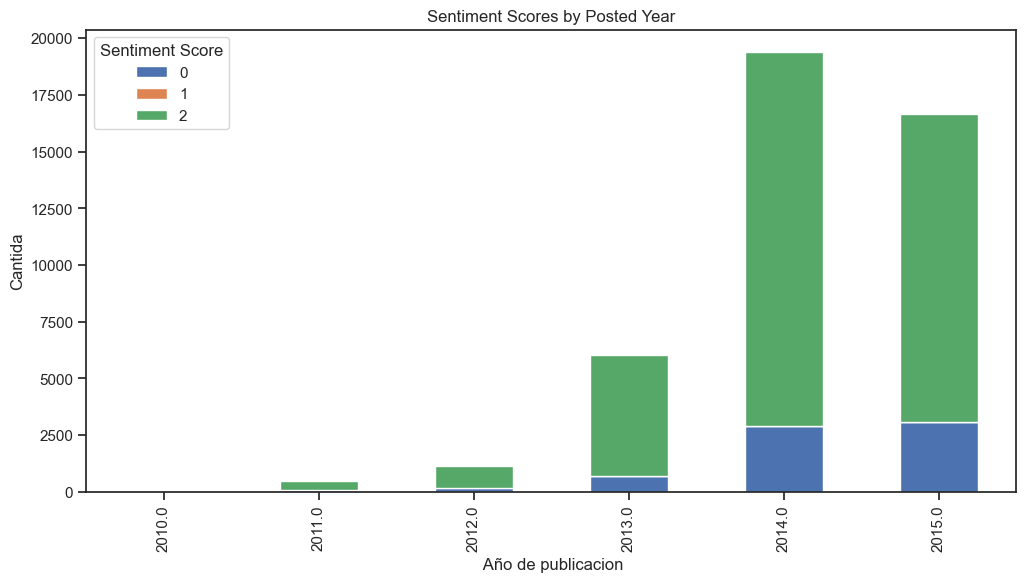

In [16]:
sns.set(style='ticks')
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel(' Año de publicacion')
plt.ylabel('Cantida')
plt.title('Sentiment Scores by Posted Year')
plt.legend(title='Sentiment Score', loc='upper left')
plt.show()

## Revisamos la correlación entre variables

In [17]:
df_numerico2 = df_numerico

<Axes: >

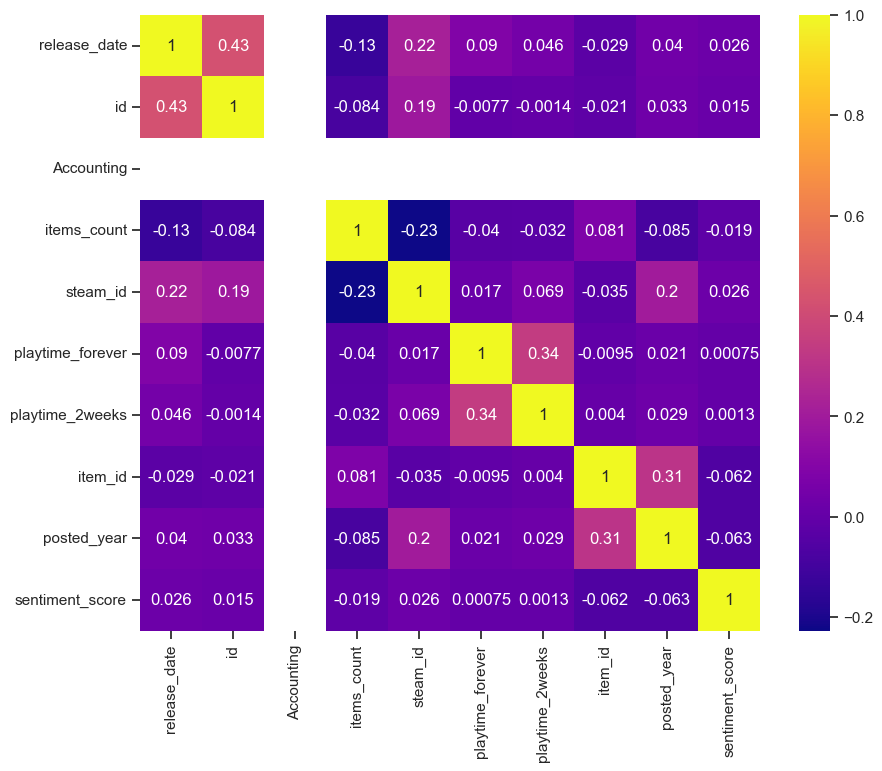

In [18]:
df_numerico2 = df_numerico2.select_dtypes(include=['float64', 'int64'])         # Filtrar solo las columnas numéricas
corr_matrix = df_numerico2.corr()                                               # Calculamos la matriz de correlación
plt.figure(figsize=(10, 8))                                                     # Graficamos el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='plasma')

## Vemos los usuarios con más reseñas

In [21]:
opinion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59333 entries, 0 to 59332
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      59333 non-null  object 
 1   user_url     59333 non-null  object 
 2   funny        8151 non-null   object 
 3   last_edited  6140 non-null   object 
 4   item_id      59305 non-null  float64
 5   helpful      59305 non-null  object 
 6   recommend    59305 non-null  object 
 7   review       59275 non-null  object 
 8   0            0 non-null      float64
 9   posted_year  49186 non-null  float64
dtypes: float64(3), object(7)
memory usage: 4.5+ MB


In [38]:
opinion.head(5)

,user_id,user_url,funny,last_edited,item_id,helpful,recommend,review,0,posted_year
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,NaN,1250.0,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN,2011.0
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,NaN,22200.0,No ratings yet,True,It's unique and worth a playthrough.,NaN,2011.0
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,NaN,43110.0,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN,2011.0
3,js41637,http://steamcommunity.com/id/js41637,NaN,NaN,251610.0,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,NaN,2014.0
4,js41637,http://steamcommunity.com/id/js41637,NaN,NaN,227300.0,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,NaN,2013.0


In [ ]:
dicc = {}
conteo_desarrolladores = opinion['user_id'].value_counts()                          # Contar las ocurrencias de cada usuario
for desarrollador, count in conteo_desarrolladores.items():                         # Crear el diccionario con las ocurrencias
    dicc[desarrollador] = count

valores_mas_altos = sorted(dicc.items(), key=lambda x: x[1], reverse=True)[:8]      # Ordenar el diccionario por los valores (cantidad de ocurrencias)

top_5 = {}                                                                          # Crear un nuevo diccionario con los usuarios más altos
for clave, valor in valores_mas_altos:
    top_5[clave] = valor

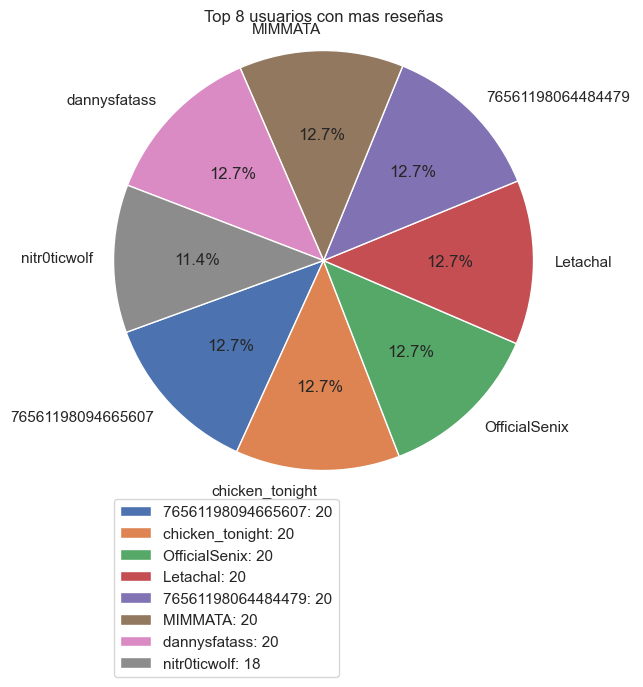

In [37]:
valores = list(top_5.values())
claves = list(top_5.keys())
plt.figure(figsize=(8, 6))

wedges, texts, autotexts = plt.pie(valores, labels=claves, autopct='%1.1f%%', startangle=200)

plt.axis('equal')
plt.title('Top 8 usuarios con mas reseñas')

# Muestra los nombres de las claves como una leyenda en la esquina inferior izquierda
legend_labels = [f"{key}: {valores[i]}" for i, key in enumerate(claves)]
plt.legend(wedges, legend_labels, loc="upper left", bbox_to_anchor=(0.15, 0))

plt.show()

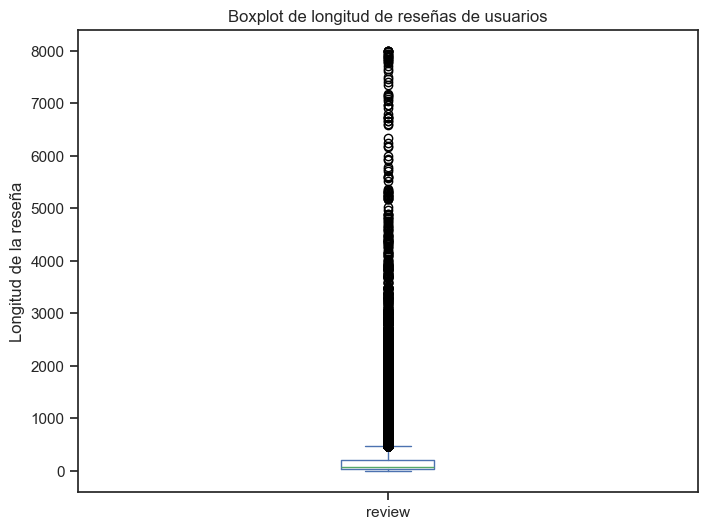

In [39]:
# Crear un boxplot de las reseñas de usuarios
plt.figure(figsize=(8, 6))
opinion['review'].str.len().plot(kind='box')
plt.title('Boxplot de longitud de reseñas de usuarios')
plt.ylabel('Longitud de la reseña')
plt.show()